In [1]:
import  matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [12]:
fapple=cv2.imread(r"C:\Users\Dell\dataset\test\freshapples\rotated_by_15_Screen Shot 2018-06-08 at 4.59.49 PM.png")

In [13]:
fapple=cv2.cvtColor(fapple,cv2.COLOR_BGR2RGB)

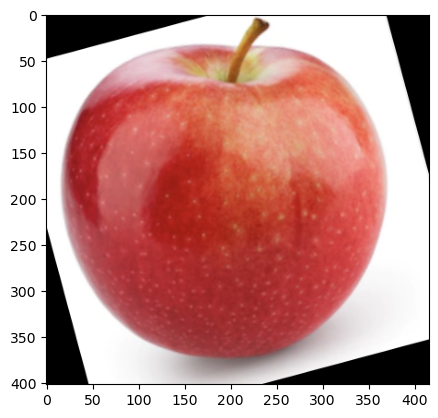

In [14]:
plt.imshow(fapple)

In [15]:
fapple.shape

(402, 416, 3)

In [16]:
rapple=cv2.imread(r"C:\Users\Dell\dataset\test\rottenapples\rotated_by_15_Screen Shot 2018-06-07 at 2.16.18 PM.png")

In [17]:
rapple=cv2.cvtColor(rapple,cv2.COLOR_BGR2RGB)

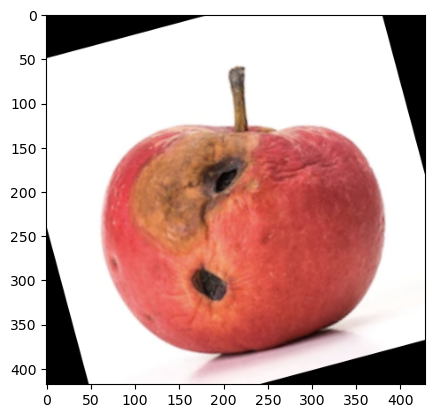

In [18]:
plt.imshow(rapple)

In [19]:

from keras.preprocessing.image import ImageDataGenerator


In [20]:
image_gen=ImageDataGenerator(rotation_range=30,width_shift_range=0.1,height_shift_range=0.1,rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

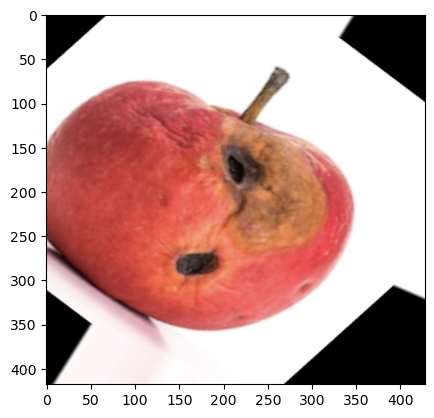

In [21]:
plt.imshow(image_gen.random_transform(rapple))

In [22]:
image_gen.flow_from_directory(r"C:\Users\Dell\dataset\train")

Found 10901 images belonging to 6 classes.


In [23]:
input_shape=(280,280,3)

In [24]:
from keras.models import Sequential

In [25]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Activation,Dropout

In [26]:
model=Sequential()
#1st
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(280,280,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening the previous layers to give 2D->1D
model.add(Flatten())
#Dense Layer and Activation 
model.add(Dense(256))
model.add(Activation('relu')) 
#Dropout
model.add(Dropout(0.6))
#Dense Layer and Activation 
model.add(Dense(6))
model.add(Activation('softmax')) 

#Compile and give loss func,optimizer and metrics
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 278, 278, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 139, 139, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 137, 137, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 68, 68, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 66, 66, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 33, 33, 64)        0

In [28]:
batch_size=16
train_image_gen=image_gen.flow_from_directory(r"C:\Users\Dell\dataset\train",target_size=input_shape[:2],batch_size=batch_size,class_mode='categorical')

Found 10901 images belonging to 6 classes.


In [29]:
test_image_gen=image_gen.flow_from_directory(r"C:\Users\Dell\dataset\test",target_size=input_shape[:2],batch_size=batch_size,class_mode='categorical')

Found 2698 images belonging to 6 classes.


In [30]:
train_image_gen.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [31]:
result=model.fit_generator(train_image_gen,epochs=10,steps_per_epoch=170,
                          validation_data=test_image_gen,validation_steps=15)

C:\Users\Dell\AppData\Local\Temp\ipykernel_16880\2223583300.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  result=model.fit_generator(train_image_gen,epochs=10,steps_per_epoch=170,


Epoch 1/10
170/170 [==============================] - 8024s 47s/step - loss: 1.4795 - accuracy: 0.4217 - val_loss: 0.8064 - val_accuracy: 0.7125
Epoch 2/10
170/170 [==============================] - 339s 2s/step - loss: 0.8799 - accuracy: 0.6871 - val_loss: 0.8140 - val_accuracy: 0.6833
Epoch 3/10
170/170 [==============================] - 344s 2s/step - loss: 0.7207 - accuracy: 0.7588 - val_loss: 0.4297 - val_accuracy: 0.8583
Epoch 4/10
170/170 [==============================] - 319s 2s/step - loss: 0.6655 - accuracy: 0.7743 - val_loss: 0.4396 - val_accuracy: 0.8417
Epoch 5/10
170/170 [==============================] - 288s 2s/step - loss: 0.6165 - accuracy: 0.7941 - val_loss: 0.4080 - val_accuracy: 0.8667
Epoch 6/10
170/170 [==============================] - 325s 2s/step - loss: 0.5121 - accuracy: 0.8283 - val_loss: 0.4168 - val_accuracy: 0.8708
Epoch 7/10
170/170 [==============================] - 317s 2s/step - loss: 0.5498 - accuracy: 0.8217 - val_loss: 0.3429 - val_accuracy: 0.87

In [44]:
model.save('fruits.h5')

c:\Users\Dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:

result.history['accuracy']

[0.4216911792755127,
 0.6871323585510254,
 0.7588235139846802,
 0.7742646932601929,
 0.7941176295280457,
 0.8283088207244873,
 0.8216911554336548,
 0.8404411673545837,
 0.841269850730896,
 0.8474264740943909]

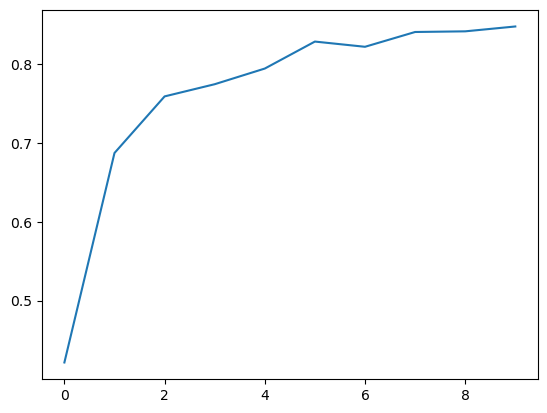

In [33]:
plt.plot(result.history['accuracy'])

In [57]:
rottenbanana= r"E:\rottenbanana.jpeg"

In [58]:
from keras.preprocessing import image


In [59]:
rottenbanana=image.load_img(rottenbanana,target_size=(280,280))

In [60]:
rottenbanana=image.img_to_array(rottenbanana)

In [61]:
rottenbanana.shape

(280, 280, 3)

In [62]:
import numpy as np
rottenbanana=np.expand_dims(rottenbanana,axis=0)

In [63]:
rottenbanana.shape

(1, 280, 280, 3)

In [64]:
rottenbanana=rottenbanana/255

In [65]:
import numpy as np



# Then you can use model.predict
y_pred = model.predict(rottenbanana)

predicted_class_indices = np.argmax(y_pred, axis=1)
predicted_class_indices

1/1 [==============================] - 0s 68ms/step


array([4], dtype=int64)

In [56]:
model.predict(rottenorange)

1/1 [==============================] - 0s 77ms/step


array([[8.2917315e-05, 1.9430736e-03, 1.8117786e-04, 8.7620621e-04,
        3.5471297e-03, 9.9336952e-01]], dtype=float32)

###Checking using external data

In [66]:
freshorange=r"E:\freshorange.jpeg"

In [67]:
freshorange=image.load_img(freshorange,target_size=(280,280))

In [68]:
freshorange=image.img_to_array(freshorange)
import numpy as np
freshorange=np.expand_dims(freshorange,axis=0)

In [69]:
freshorange=freshorange/255
freshorange.shape

(1, 280, 280, 3)

In [70]:
import numpy as np



# Then you can use model.predict
y_pred = model.predict(freshorange)

predicted_class_indices = np.argmax(y_pred, axis=1)
predicted_class_indices

1/1 [==============================] - 0s 74ms/step


array([2], dtype=int64)